In [3]:
import os

import sys
import numpy as np
import shutil
import copy
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pickle

In [9]:
DATA_DIR = 'data/yolov5'
IMG_DIR = os.path.join(DATA_DIR, 'images')
ANO_DIR = os.path.join(DATA_DIR, 'labels')
TEST_DIR = os.path.join(DATA_DIR, 'test_images')
with open('coordinate.pickle', 'rb') as web:
    coords = pickle.load(web)

### train test split

In [6]:
files = os.listdir(GRAY_DIR)
files_train, files_valid_test = train_test_split(files)
files_valid, files_test = train_test_split(files_valid_test)

In [ ]:
files = os.listdir(DATA_DIR)
files_train, files_valid_test = train_test_split(files)
files_valid, files_test = train_test_split(files_valid_test)

In [7]:
print(len(files_train))
print(len(files_valid))
print(len(files_test))

1998
499
167


In [10]:
with open(os.path.join(DATA_DIR,'train.txt'), 'w') as f:
    for file in files_train:
        print(os.path.join(IMG_DIR,file), file=f)

In [11]:
with open(os.path.join(DATA_DIR,'valid.txt'), 'w') as f:
    for file in files_valid:
        print(os.path.join(IMG_DIR,file), file=f)

In [12]:
with open(os.path.join(DATA_DIR,'test.txt'), 'w') as f:
    for file in files_test:
        print(os.path.join(IMG_DIR,file), file=f)

### YOLO format

In [30]:
def write_marker(img, coords):
    COLOR = (255, 255, 0)
    for i in range(len(coords)):
        coord = (coords[i][0], coords[i][1])
        cv2.drawMarker(img, coord, COLOR, thickness=3, markerType=cv2.MARKER_CROSS)
        #cv2.putText(img, '+', coord, cv2.FONT_HERSHEY_PLAIN, 4,  coord, 3, cv2.LINE_AA)
        
    return img

In [31]:
files = os.listdir(IMG_DIR)

for file in tqdm(files):
    img = cv2.imread(os.path.join(IMG_DIR, file))
    height, width = img.shape[:2]
    
    true_zahyo = zahyos[file]
    #img = write_marker(img, true_zahyo)
    
    zahyo0 = zahyos[file][0]
    zahyo1 = zahyos[file][1]
    c = (np.array(zahyo0)+np.array(zahyo1))/2
    r = np.linalg.norm(np.array(zahyo0)-np.array(zahyo1))/2

    pt1 = np.array(c)-[r,r]
    pt2 = np.array(c)+[r,r]
    # draw bounding box
    bbox = cv2.rectangle(img, tuple([int(s) for s in pt1]), tuple([int(s) for s in pt2]), (255, 0, 0), thickness=2)
    x_center = c[0]
    y_center = c[1]
    #print(0, x_center, y_center, r*2, r*2)
    #print(0, x_center/width, y_center/height, r*2/width, r*2/height)
    #plt.imshow(bbox);plt.show()
    
    # save YOLO format(class, bbos x_center, bbox y_center, bbox widht, bbox height)
    with open(os.path.join(ANO_DIR,file[:-4]+'.txt'), 'w') as f:
        print(0, x_center/width, y_center/height, r*2/width, r*2/height, file=f)

100%|██████████| 10/10 [00:00<00:00, 117.70it/s]


### copy test images

In [43]:
files_test = []
with open(os.path.join(DATA_DIR, 'test.txt')) as f:
    for line in f:
        line = line.rstrip()  # 読み込んだ行の末尾には改行文字があるので削除
        #print(line)
        files_test.append(os.path.basename(line))

In [45]:
for file in files_test:
    shutil.copyfile(os.path.join(IMG_DIR, file), os.path.join(TEST_DIR, file))

### draw bbox

  0%|          | 0/5 [00:00<?, ?it/s]

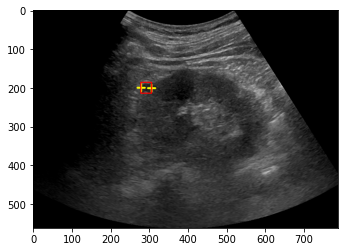

 20%|██        | 1/5 [00:00<00:00,  5.99it/s]

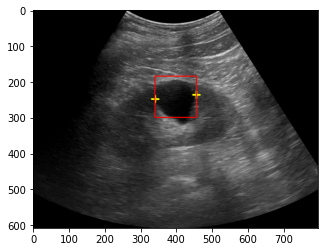

 40%|████      | 2/5 [00:00<00:00,  5.56it/s]

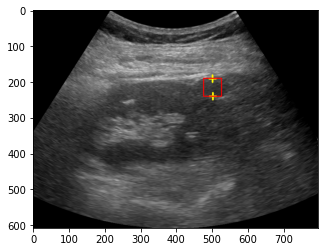

 60%|██████    | 3/5 [00:00<00:00,  6.24it/s]

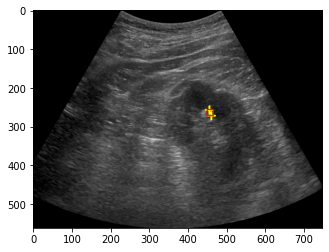

 80%|████████  | 4/5 [00:00<00:00,  5.95it/s]

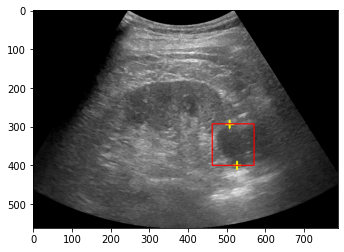

100%|██████████| 5/5 [00:00<00:00,  6.21it/s]


In [41]:
files = os.listdir(IMG_DIR)

for file in tqdm(files[:5]):    
    with open(os.path.join(ANO_DIR,file[:-4]+'.txt')) as f:
        dst = f.read().split()
    img = cv2.imread(os.path.join(IMG_DIR, file))
    img_height, img_width = img.shape[:2]
    true_zahyo = zahyos[file]
    img = write_marker(img, true_zahyo)

    for i in range(int(len(dst)/5)):
        x_center = float(dst[i*5+1])*img_width
        y_center = float(dst[i*5+2])*img_height
        width = float(dst[i*5+3])*img_width
        height = float(dst[i*5+4])*img_height
        up_left = (int(x_center-width/2),int(y_center-height/2))
        bt_right = (int(x_center+width/2),int(y_center+height/2))
        bbox = cv2.rectangle(img, up_left, bt_right, (255, 0, 0), thickness=2)
    plt.imshow(bbox);plt.show()